In [9]:
import os

os.chdir(os.path.expanduser("~/PycharmProjects/Python-Business-science"))

In [11]:
import warnings

warnings.filterwarnings("ignore")

In [46]:
# imports

# Allow us to make markdown

from IPython.display import Markdown as md
from IPython.display import HTML


# Core package
import pandas as pd
import numpy as np

from mizani.formatters import label_dollar

#

from transformer.data_access import DataAccess
from my_pandas_extension.plot_forecast import plot_forecast

In [47]:
db_access = DataAccess()

In [48]:
all_forecasts_df = db_access.read_data_from_db(table_name="forecast")

In [49]:
all_forecasts_df["id"].unique()

array(['Total Revenue', 'Category 1: Mountain', 'Category 1: Road',
       'Category 2: Cross Country Race', 'Category 2: Cyclocross',
       'Category 2: Elite Road', 'Category 2: Endurance Road',
       'Category 2: Fat Bike', 'Category 2: Over Mountain',
       'Category 2: Sport', 'Category 2: Trail', 'Category 2: Triathalon',
       'Bikeshop: Albuquerque Cycles', 'Bikeshop: Ann Arbor Speed',
       'Bikeshop: Austin Cruisers', 'Bikeshop: Cincinnati Speed',
       'Bikeshop: Columbus Race Equipment', 'Bikeshop: Dallas Cycles',
       'Bikeshop: Denver Bike Shop', 'Bikeshop: Detroit Cycles',
       'Bikeshop: Indianapolis Velocipedes',
       'Bikeshop: Ithaca Mountain Climbers',
       'Bikeshop: Kansas City 29ers', 'Bikeshop: Las Vegas Cycles',
       'Bikeshop: Los Angeles Cycles',
       'Bikeshop: Louisville Race Equipment',
       'Bikeshop: Miami Race Equipment',
       'Bikeshop: Minneapolis Bike Shop', 'Bikeshop: Nashville Cruisers',
       'Bikeshop: New Orleans Velociped

In [18]:
# Select columns to one we want

ids = ["Total Revenue", "Mountain", "Road"]

filtered_forecast_Df = all_forecasts_df[
    all_forecasts_df.id.isin(ids)
].reset_index(drop=True)

In [19]:
title = "Forecast Report"

md(f"# {title}")

# Forecast Report

In [22]:
# Display ID that were filtered


md(f"**Reporting Results for**: {', '.join(ids)}")

**Reporting Results for**: Total Revenue, Mountain, Road

### Performance Summary

In [26]:
filtered_forecast_Df["date"] = pd.to_datetime(filtered_forecast_Df["date"])

In [42]:
usd_label = label_dollar(big_mark=",", precision=0)

In [44]:
(
    filtered_forecast_Df.loc[:, ["id", "date", "value"]]
    .dropna()
    .set_index("date")
    .groupby("id")
    .resample("Y")
    .value.sum()
    .reset_index()
    .assign(year=lambda x: x.date.dt.year)
    .pivot_table(index="id", columns="year", values="value", aggfunc=np.sum)
    .style.background_gradient(cmap="Blues", axis=1)
    .format(lambda x: usd_label([x])[0])
)

year,2011,2012,2013,2014,2015
id,,,,,
Mountain,"$6,223,210","$6,809,040","$9,042,625","$7,502,750","$9,577,110"
Road,"$5,069,675","$5,354,035","$7,438,150","$6,421,335","$7,594,400"
Total Revenue,"$11,292,885","$12,163,075","$16,480,775","$13,924,085","$17,171,510"


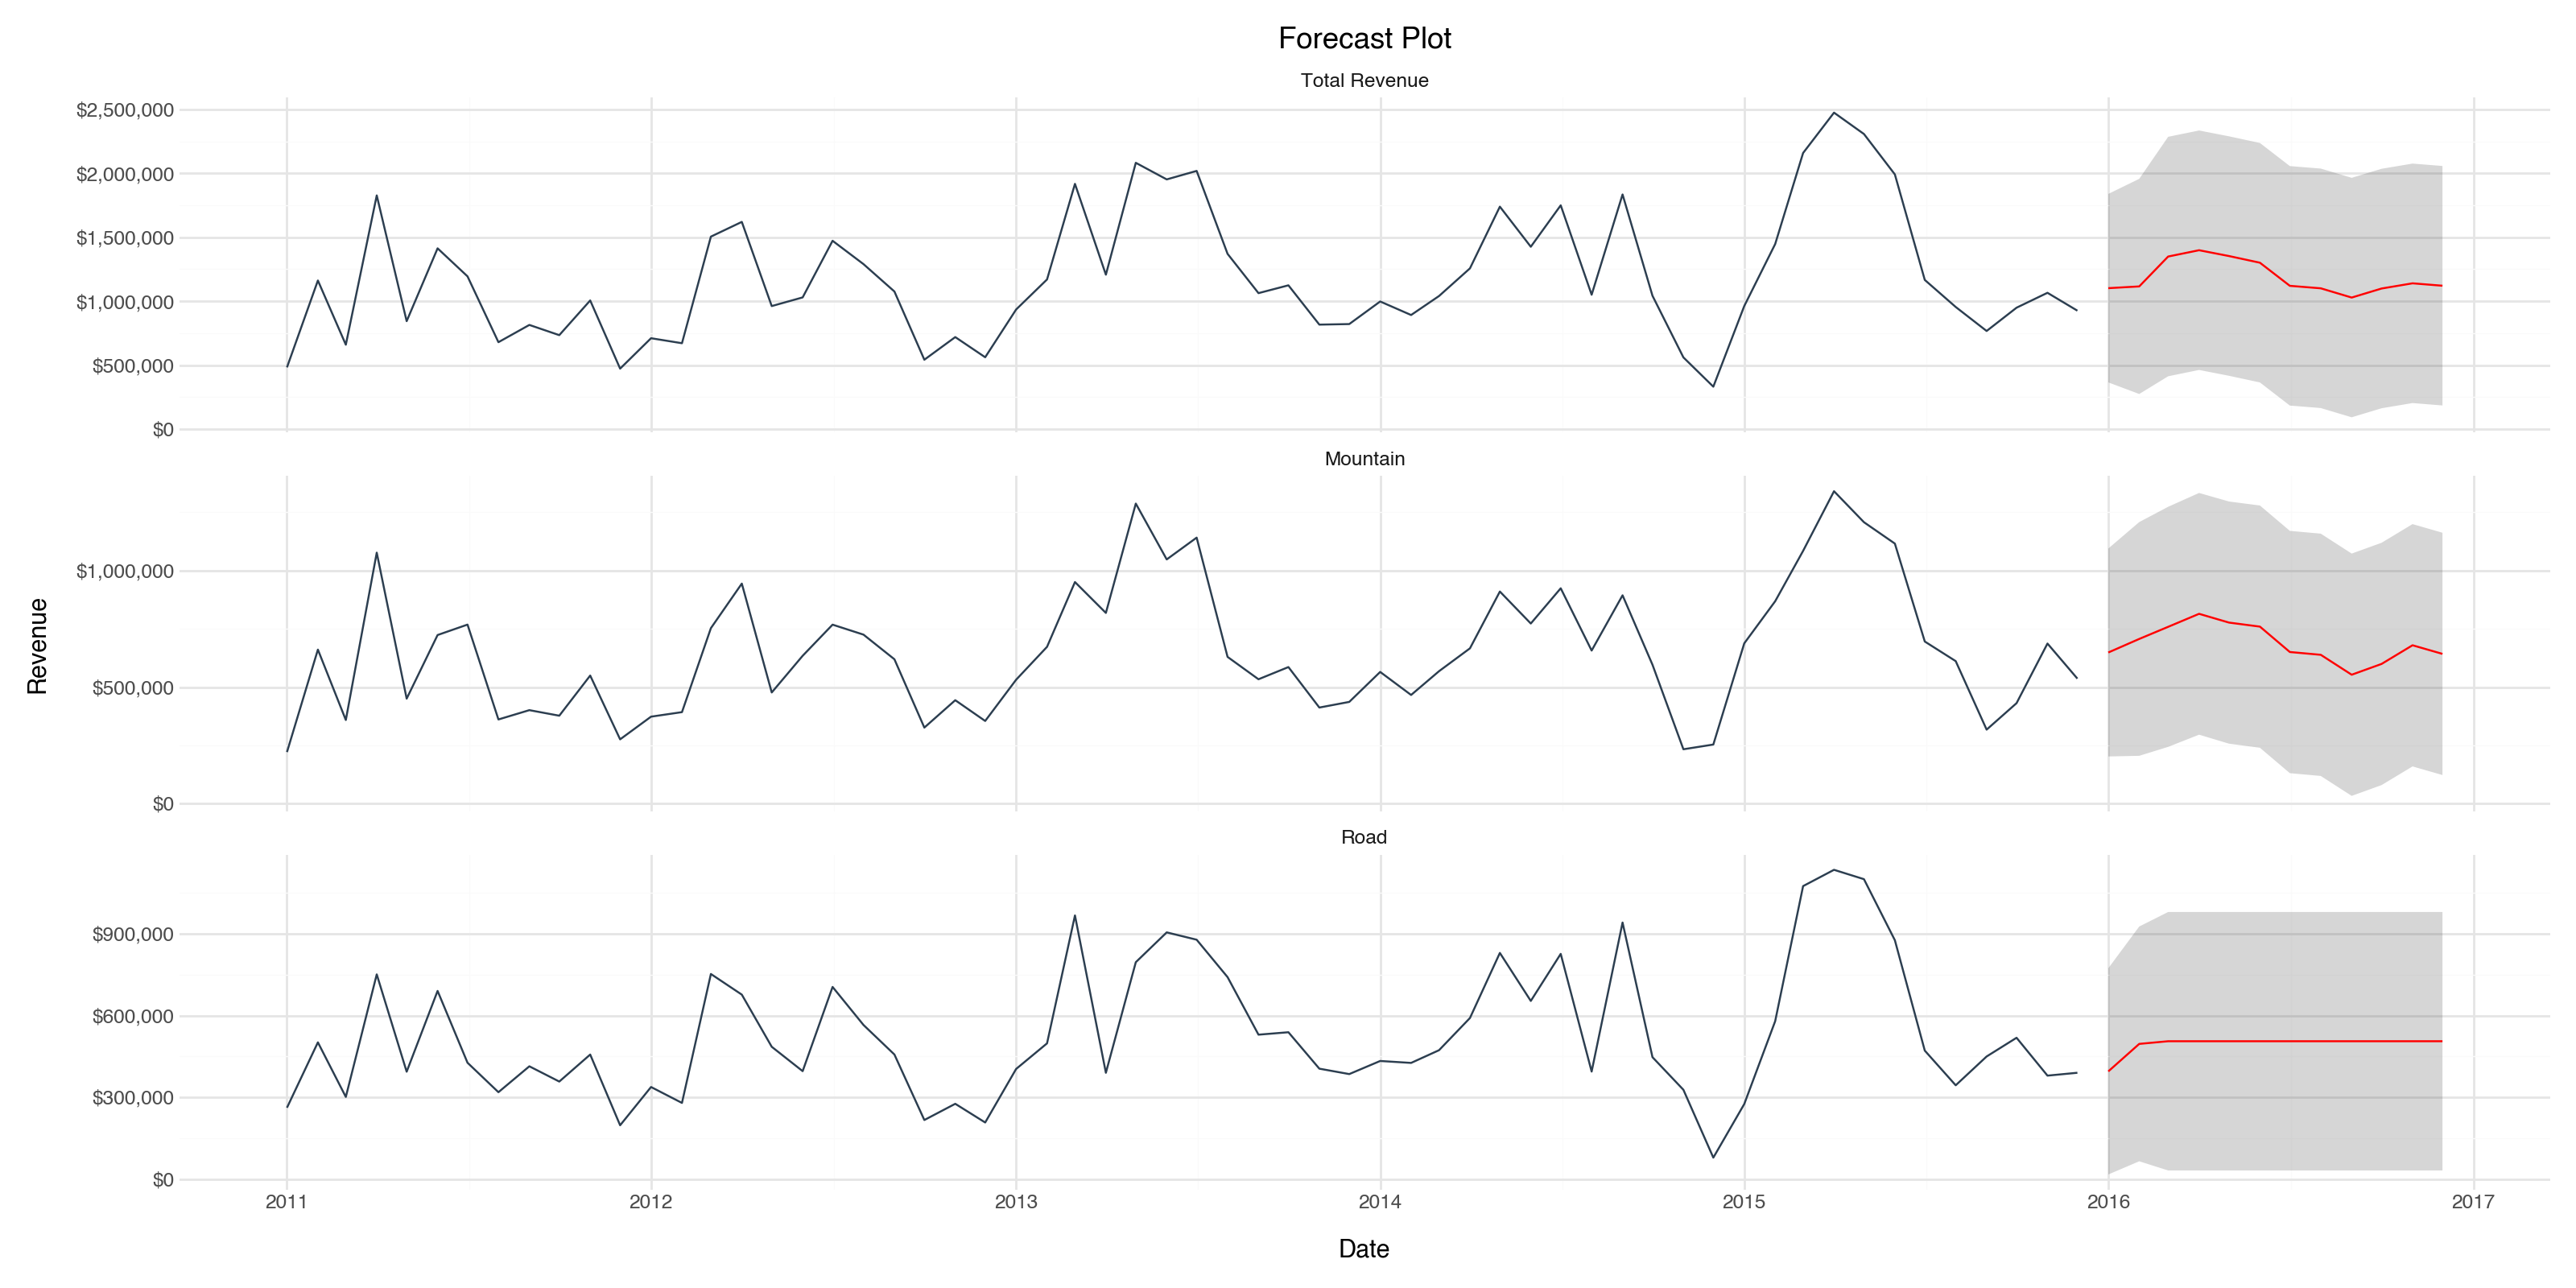

In [45]:
plot_forecast(
    data=filtered_forecast_Df, date_column="date", id_column="id", facet_ncol=1
)